In [28]:
!git clone https://github.com/NicoEssi/Undercomplete_Autoencoder.git

fatal: destination path 'Undercomplete_Autoencoder' already exists and is not an empty directory.


In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
training_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_trn.csv", header = None)
training_set0 = np.array(training_set0, dtype = "int")

training_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_trn.csv", header = None)
#training_set1 = np.array(training_set1, dtype = "int")

test_set0 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/bindigit_tst.csv", header = None)
test_set0 = np.array(test_set0, dtype = "int")

test_set1 = pd.read_csv("/content/Undercomplete_Autoencoder/MNIST/targetdigit_tst.csv", header = None)
#test_set1 = np.array(test_set1, dtype = "int")

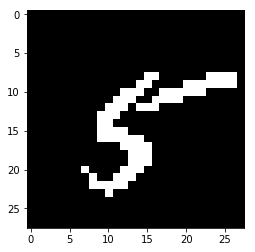

In [31]:
def displayMNIST(data, index):
    display_number = data[index, :]
    display_number = display_number.reshape([28, 28])
    plt.imshow(display_number, cmap='gray')
    plt.show
    
def displayMNIST_alt(image):
    image = image.reshape([28,28])
    plt.imshow(image, cmap='gray')
    plt.show

displayMNIST(training_set0, 135) # test 0
#displayMNIST(test_set0, 137) # test 0

In [0]:
trn_data = torch.cuda.FloatTensor(training_set0)
tst_data = torch.cuda.FloatTensor(test_set0)

In [0]:
class autoenc(nn.Module):
    def __init__(self, nodes = 100):
        super(autoenc, self).__init__() # inheritence
        self.full_connection0 = nn.Linear(784, nodes) # encoding weights
        self.full_connection1 = nn.Linear(nodes, 784) # decoding weights
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.full_connection0(x)) # input encoding
        x = self.full_connection1(x) # output decoding
        return x

In [0]:
model = autoenc().cuda() #.cuda() - to move to GPU
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),
                          lr = 1e-3, weight_decay = 1/2)



In [0]:
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)

In [36]:
loss_epoch1 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch1.append(loss_calculated)

epoch: 1   loss: 0.3997775120937668
epoch: 2   loss: 0.4964393963305602
epoch: 3   loss: 0.6337621123329102
epoch: 4   loss: 0.8292580894618138
epoch: 5   loss: 0.9707192269619498
epoch: 6   loss: 1.3393757167087676
epoch: 7   loss: 1.3370082940560901
epoch: 8   loss: 2.0831362149471238
epoch: 9   loss: 1.769950348289987
epoch: 10   loss: 2.8359161799337262
epoch: 11   loss: 3.435386702275707
epoch: 12   loss: 2.256895454012492
epoch: 13   loss: 5.132990871975541
epoch: 14   loss: 4.7208915707577335
epoch: 15   loss: 2.102017249540564
epoch: 16   loss: 5.608499125824111
epoch: 17   loss: 5.331111073587598
epoch: 18   loss: 2.00847853671864
epoch: 19   loss: 4.358589243014843
epoch: 20   loss: 6.525645132673812
epoch: 21   loss: 3.4937905047498106
epoch: 22   loss: 2.0570900461115924
epoch: 23   loss: 4.354497666316358
epoch: 24   loss: 6.056469430437298
epoch: 25   loss: 3.1129439546945186
epoch: 26   loss: 2.2159605375583853
epoch: 27   loss: 3.103001855670343
epoch: 28   loss: 5.1131

KeyboardInterrupt: ignored

In [24]:
model2 = autoenc(nodes = 200).cuda() #.cuda() - to move to GPU
optimizer2 = optim.Adam(model2.parameters(),
                          lr = 1e-3, weight_decay = 1/2)
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)
loss_epoch2 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model2(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer2.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch2.append(loss_calculated)



epoch: 1   loss: 0.4254735417246018
epoch: 2   loss: 0.7038992993535769
epoch: 3   loss: 1.1444145365358827
epoch: 4   loss: 1.6007558264032729
epoch: 5   loss: 2.16468619506633
epoch: 6   loss: 2.3983529820008593
epoch: 7   loss: 3.4203579335990324
epoch: 8   loss: 3.6160746325784277
epoch: 9   loss: 5.350300731216929
epoch: 10   loss: 3.9177106240875252
epoch: 11   loss: 6.049067394692974
epoch: 12   loss: 3.9486047470728485
epoch: 13   loss: 4.351804180290959
epoch: 14   loss: 5.547305895682922
epoch: 15   loss: 3.577722255977038
epoch: 16   loss: 3.9709420837692364
epoch: 17   loss: 4.411373291009745
epoch: 18   loss: 4.267785376264218
epoch: 19   loss: 3.4521682865216463
epoch: 20   loss: 3.4163537300122155
epoch: 21   loss: 4.83137262972944
epoch: 22   loss: 3.348498934864744
epoch: 23   loss: 3.486625487098679
epoch: 24   loss: 3.2365865037682657
epoch: 25   loss: 4.832805839288437
epoch: 26   loss: 3.759088403445057
epoch: 27   loss: 3.050516591665724
epoch: 28   loss: 3.203400

In [26]:
model3 = autoenc(nodes = 400).cuda() #.cuda() - to move to GPU
optimizer3 = optim.Adam(model3.parameters(),
                          lr = 1e-3, weight_decay = 1/2)
num_epochs = 500
batch_size = 32
length = int(len(trn_data) / batch_size)
loss_epoch3 = []

for epoch in range(num_epochs):
    train_loss = 0
    score = 0. 
    
    
    for num_data in range(length - 2):
        #print(str(num_data) + "; length = " + str(length) + "   num_data = " + str(num_data))
        batch_ind = (batch_size * num_data)
        input = Variable(trn_data[batch_ind : batch_ind + batch_size]).cuda() #.cuda() - to move to GPU
        # === forward propagation ===
        #print("batch_ind = " + str(batch_ind) + "   batch_ind + batch_size = " + str(batch_ind + batch_size))
        output = model3(input)
        loss = criterion(output, trn_data[batch_ind : batch_ind + batch_size]) # loss between ŷ and y
        # === backward propagation ===
        loss.backward()
        # === calculating epoch loss ===
        train_loss += np.sqrt(loss.item())
        score += 1. #<- add for average loss error instead of total
        optimizer3.step()
    
    loss_calculated = train_loss/score
    print('epoch: ' + str(epoch + 1) + '   loss: ' + str(loss_calculated))
    loss_epoch3.append(loss_calculated)


epoch: 1   loss: 0.5247461085057042
epoch: 2   loss: 1.4605352114473766
epoch: 3   loss: 2.4067489098767068
epoch: 4   loss: 3.1380160773835097
epoch: 5   loss: 3.978485064561539
epoch: 6   loss: 4.628384894753286
epoch: 7   loss: 4.761361696615095
epoch: 8   loss: 4.330400488538271
epoch: 9   loss: 4.448761431176256
epoch: 10   loss: 4.921544470592476
epoch: 11   loss: 5.076834990735261
epoch: 12   loss: 4.49894023342423
epoch: 13   loss: 4.0852427291270095
epoch: 14   loss: 5.3882633295310844
epoch: 15   loss: 4.443376528074276
epoch: 16   loss: 3.899694477761142
epoch: 17   loss: 5.384332194813509
epoch: 18   loss: 3.801834612076792
epoch: 19   loss: 4.977993906235681
epoch: 20   loss: 4.399160696197027
epoch: 21   loss: 4.623285107864945
epoch: 22   loss: 4.511077095887783
epoch: 23   loss: 4.897863816223229
epoch: 24   loss: 4.161868210152896
epoch: 25   loss: 5.241638085566545
epoch: 26   loss: 4.117279446233237
epoch: 27   loss: 5.358016611636538
epoch: 28   loss: 4.285969743171

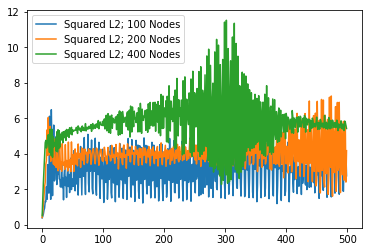

In [27]:
plt.plot(loss_epoch1, label = "Squared L2; 100 Nodes")
plt.plot(loss_epoch2, label = "Squared L2; 200 Nodes")
plt.plot(loss_epoch3, label = "Squared L2; 400 Nodes")
plt.legend()
plt.show()

In [0]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model(input)
    outputs.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 100 ; loss: ' + str(loss_calculated))


In [0]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs2 = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model2(input)
    outputs2.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 200 ; loss: ' + str(loss_calculated))


In [0]:
test_loss = 0
s = 0.
length = len(tst_data)
outputs3 = []

for num_data in range (length):
    input = Variable(tst_data[num_data]).cuda()
    # === forward propagation ===
    output = model3(input)
    outputs3.append(output)
    loss = criterion(output, tst_data[num_data])
    # === calculating loss ===
    test_loss += np.sqrt(loss.item())
    s += 1.

loss_calculated = test_loss/s
print('n: 400 ; loss: ' + str(loss_calculated))


In [0]:
# 9 - Preprocessing for visualizing reconstructions from each model

# 9.0 - From input
outputs0_array = []
outputs0_array.append(test_set0[3])     # add 1
outputs0_array.append(test_set0[7])     # add 2
outputs0_array.append(test_set0[0])     # add 3
outputs0_array.append(test_set0[2])     # add 4
outputs0_array.append(test_set0[1])     # add 5
outputs0_array.append(test_set0[14])    # add 6
outputs0_array.append(test_set0[8])     # add 7
outputs0_array.append(test_set0[6])     # add 8
outputs0_array.append(test_set0[5])     # add 9
outputs0_array.append(test_set0[18])    # add 0

# 9.1 - From model 1
outputs_array = []
outputs_array.append(outputs[3].cpu().detach().numpy())     # add 1
outputs_array.append(outputs[7].cpu().detach().numpy())     # add 2
outputs_array.append(outputs[0].cpu().detach().numpy())     # add 3
outputs_array.append(outputs[2].cpu().detach().numpy())     # add 4
outputs_array.append(outputs[1].cpu().detach().numpy())     # add 5
outputs_array.append(outputs[14].cpu().detach().numpy())    # add 6
outputs_array.append(outputs[8].cpu().detach().numpy())     # add 7
outputs_array.append(outputs[6].cpu().detach().numpy())     # add 8
outputs_array.append(outputs[5].cpu().detach().numpy())     # add 9
outputs_array.append(outputs[18].cpu().detach().numpy())    # add 0

# 9.2 - From model 2
outputs2_array = []
outputs2_array.append(outputs2[3].cpu().detach().numpy())     # add 1
outputs2_array.append(outputs2[7].cpu().detach().numpy())     # add 2
outputs2_array.append(outputs2[0].cpu().detach().numpy())     # add 3
outputs2_array.append(outputs2[2].cpu().detach().numpy())     # add 4
outputs2_array.append(outputs2[1].cpu().detach().numpy())     # add 5
outputs2_array.append(outputs2[14].cpu().detach().numpy())    # add 6
outputs2_array.append(outputs2[8].cpu().detach().numpy())     # add 7
outputs2_array.append(outputs2[6].cpu().detach().numpy())     # add 8
outputs2_array.append(outputs2[5].cpu().detach().numpy())     # add 9
outputs2_array.append(outputs2[18].cpu().detach().numpy())    # add 0

# 9.3 - From model 3
outputs3_array = []
outputs3_array.append(outputs3[3].cpu().detach().numpy())     # add 1
outputs3_array.append(outputs3[7].cpu().detach().numpy())     # add 2
outputs3_array.append(outputs3[0].cpu().detach().numpy())     # add 3
outputs3_array.append(outputs3[2].cpu().detach().numpy())     # add 4
outputs3_array.append(outputs3[1].cpu().detach().numpy())     # add 5
outputs3_array.append(outputs3[14].cpu().detach().numpy())    # add 6
outputs3_array.append(outputs3[8].cpu().detach().numpy())     # add 7
outputs3_array.append(outputs3[6].cpu().detach().numpy())     # add 8
outputs3_array.append(outputs3[5].cpu().detach().numpy())     # add 9
outputs3_array.append(outputs3[18].cpu().detach().numpy())    # add 0

In [0]:
img_recon = []
for ind in range(10):
    img_rec = np.concatenate((outputs0_array[ind].reshape([28, 28]), 
                              outputs_array[ind].reshape([28, 28]),
                              outputs2_array[ind].reshape([28, 28]),
                              outputs3_array[ind].reshape([28, 28])), axis = 1)
    plt.imshow(img_rec, cmap = "gray")
    img_recon.append(img_rec)

img_complete = img_recon[0]
for app in range(9):
    img_complete = np.concatenate((img_complete, img_recon[app+1]), axis = 0)
plt.imshow(img_complete)

In [0]:
def binaryVis(val): # val = cutoff value
    img_complete_bin = img_complete
    img_complete_bin[img_complete_bin > val] = 1
    img_complete_bin[img_complete_bin < val] = 0
    plt.imshow(img_complete_bin)

binaryVis(0.5)


In [0]:
# 11 - Transform model weights into matrix arrays

# 11.1 - Converting weights from first model into arrays
weights11 = model.full_connection0.weight.data.cpu().detach().numpy()
weights12 = model.full_connection1.weight.data.cpu().detach().numpy()

# 11.2 - Converting weights from first model into arrays
weights21 = model2.full_connection0.weight.data.cpu().detach().numpy()
weights22 = model2.full_connection1.weight.data.cpu().detach().numpy()

# 11.3 - Converting weights from first model into arrays
weights31 = model3.full_connection0.weight.data.cpu().detach().numpy()
weights32 = model3.full_connection1.weight.data.cpu().detach().numpy()


In [0]:
def displayWeights(weights, index):
    weights = weights[:, index].reshape([28, 28])
    plt.imshow(weights, cmap='gray')
    plt.show
displayWeights(weights32, 13)


In [0]:
def displayWeights_full(weights):
    imgs_list = []
    for x_dim in range(20):
        for y_dim in range(20):
            if y_dim == 0 and x_dim == 0:
                imgs = weights[:, 0].reshape([28, 28])
            if y_dim == 0 and x_dim > 0:
                imgs_list.append(imgs)
                imgs = weights[:, x_dim].reshape([28, 28])
            if y_dim > 0:
                imgs = np.concatenate((imgs, weights[:, x_dim + y_dim].reshape([28, 28])), axis = 1)
    
    imgs_complete = imgs_list[0]
    for x_dim2 in range(19):
        print(len(imgs_complete))
        print(len(imgs_list[x_dim2]))
        imgs_complete = np.concatenate((imgs_complete, imgs_list[x_dim2]), axis = 0)
    
    plt.imshow(imgs_complete, cmap = "gray")

displayWeights_full(weights12)  # model with 100 nodes
displayWeights_full(weights22)  # model with 200 nodes
displayWeights_full(weights32)  # model with 400 nodes


In [0]:

# 13 - Calculate the sparseness of hidden layer representations

def SparsenessCalc(weights, val):
    weights_s = weights.ravel()
    weights_s[weights_s > val] = 0
    weights_s[weights_s < -val] = 0
    weights_s[weights_s > 0] = 1
    weights_s[weights_s < 0] = 1
    return sum(weights_s)/len(weights_s)

print("cutoff value: 1e-5")
print("model 1: " + str(SparsenessCalc(weights12.copy(), 1e-5)))
print("model 2: " + str(SparsenessCalc(weights22.copy(), 1e-5)))
print("model 3: " + str(SparsenessCalc(weights32.copy(), 1e-5)))
sum_sparse = SparsenessCalc(weights12.copy(), 1e-5) + SparsenessCalc(weights22.copy(), 1e-5) + SparsenessCalc(weights32.copy(), 1e-5)
print("average: " + str(sum_sparse/3))